In [3]:
od.download( "kaggle.com/datasets/tunguz/us-elections-dataset") 

Skipping, found downloaded files in "./us-elections-dataset" (use force=True to force download)


In [4]:
import pandas as pd

In [5]:
data = pd.read_csv('us-elections-dataset/1976-2020-president.csv')

In [6]:
data.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified
0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,20210113,NaN,DEMOCRAT
1,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,504070,1182850,20210113,NaN,REPUBLICAN
2,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"MADDOX, LESTER",AMERICAN INDEPENDENT PARTY,False,9198,1182850,20210113,NaN,OTHER
3,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"BUBAR, BENJAMIN """"BEN""""",PROHIBITION,False,6669,1182850,20210113,NaN,OTHER
4,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"HALL, GUS",COMMUNIST PARTY USE,False,1954,1182850,20210113,NaN,OTHER


In [7]:
# Fill missing values
data['party_detailed'].fillna('Independent', inplace=True)
data['candidate'].fillna(data['candidate'].mode()[0], inplace=True)
data.dropna(subset=['writein'], inplace=True)

# Drop unnecessary columns
data.drop(columns=['notes', 'version'], inplace=True)


/tmp/ipykernel_159606/1492520939.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['party_detailed'].fillna('Independent', inplace=True)
/tmp/ipykernel_159606/1492520939.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [8]:
data.isnull().sum()

year                0
state               0
state_po            0
state_fips          0
state_cen           0
state_ic            0
office              0
candidate           0
party_detailed      0
writein             0
candidatevotes      0
totalvotes          0
party_simplified    0
dtype: int64

In [9]:
data['candidatevotes'] = pd.to_numeric(data['candidatevotes'], errors='coerce')
data['totalvotes'] = pd.to_numeric(data['totalvotes'], errors='coerce')


In [10]:
data = pd.get_dummies(data, columns=['party_simplified', 'candidate', 'party_detailed', 'office', 'state', 'state_po'], drop_first=True)


In [11]:
elections_grouped = data.groupby('year')
winners = elections_grouped.apply(lambda x: x.loc[x['candidatevotes'].idxmax()])
data['winner'] = 0
data.loc[winners.index, 'winner'] = 1


/tmp/ipykernel_159606/594549254.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  winners = elections_grouped.apply(lambda x: x.loc[x['candidatevotes'].idxmax()])


In [12]:
features = ['year', 'state_fips', 'state_cen', 'state_ic', 'writein', 'candidatevotes', 'totalvotes', 
            'party_simplified_LIBERTARIAN', 'party_simplified_OTHER', 'party_simplified_REPUBLICAN']
target = 'winner'
data_subset = data[features + [target]]


In [13]:
from sklearn.model_selection import train_test_split
X = data_subset[features]
y = data_subset[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [15]:
#check with validation data 

In [16]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9964994165694282

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       855
           1       0.00      0.00      0.00         2

    accuracy                           1.00       857
   macro avg       0.50      0.50      0.50       857
weighted avg       1.00      1.00      1.00       857



In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Example assuming y_test and y_pred are defined
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Precision: 0.0
Recall: 0.0
F1-score: 0.0
ROC-AUC Score: 0.8596491228070174

Confusion Matrix:
[[854   1]
 [  2   0]]


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [19]:
model2 = LogisticRegression(random_state=42)
model2.fit(X_train, y_train)

/home/user/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [20]:
y_proba = model2.predict_proba(X_test)[:, 1]

In [22]:
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC Score: {roc_auc}")

ROC-AUC Score: 0.8596491228070174


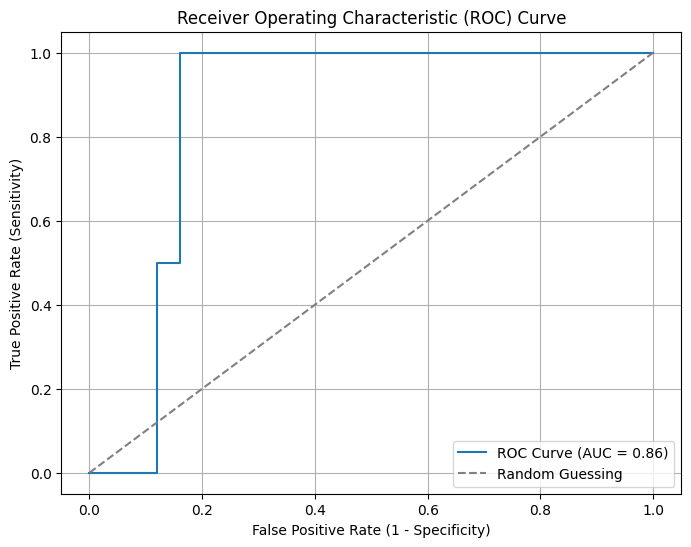

In [23]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
'''AUC = 0.86: This suggests that the model has a very good ability
to distinguish between positive and negative classes. '''

'AUC = 0.86: This suggests that the model has a very good ability\nto distinguish between positive and negative classes. '

In [25]:
from sklearn.model_selection import cross_val_score

# Cross-validation for RandomForestClassifier
rf_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Random Forest Cross-Validation Scores:")
print(rf_scores)
print("Mean Accuracy:", rf_scores.mean())

# Cross-validation for LogisticRegression
lr_scores = cross_val_score(model2, X, y, cv=5, scoring='accuracy')
print("\nLogistic Regression Cross-Validation Scores:")
print(lr_scores)
print("Mean Accuracy:", lr_scores.mean())


Random Forest Cross-Validation Scores:
[0.99766628 0.99649942 0.97549592 0.99649942 0.99766355]
Mean Accuracy: 0.9927649156479351


/home/user/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/user/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 


Logistic Regression Cross-Validation Scores:
[0.99766628 0.99766628 0.99649942 0.99649942 0.99766355]
Mean Accuracy: 0.997198987993326


/home/user/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
#hyperparamater tuning

In [27]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Accuracy: 0.9970819944244642


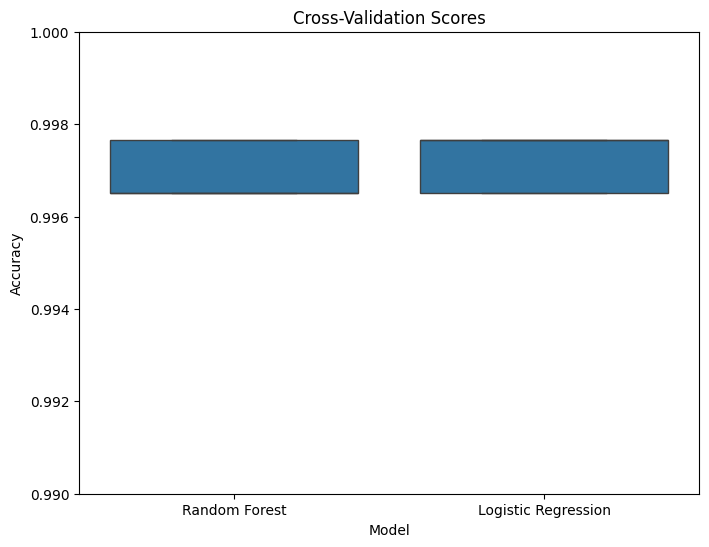

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Combine cross-validation results into a DataFrame
cv_results = pd.DataFrame({
    'Model': ['Random Forest'] * 5 + ['Logistic Regression'] * 5,
    'Accuracy': np.concatenate([rf_scores, lr_scores])
})

# Plotting cross-validation results
plt.figure(figsize=(8, 6))
sns.boxplot(x='Model', y='Accuracy', data=cv_results)
plt.title('Cross-Validation Scores')
plt.ylim(0.99, 1.0)  # Adjust ylim based on your scores
plt.show()


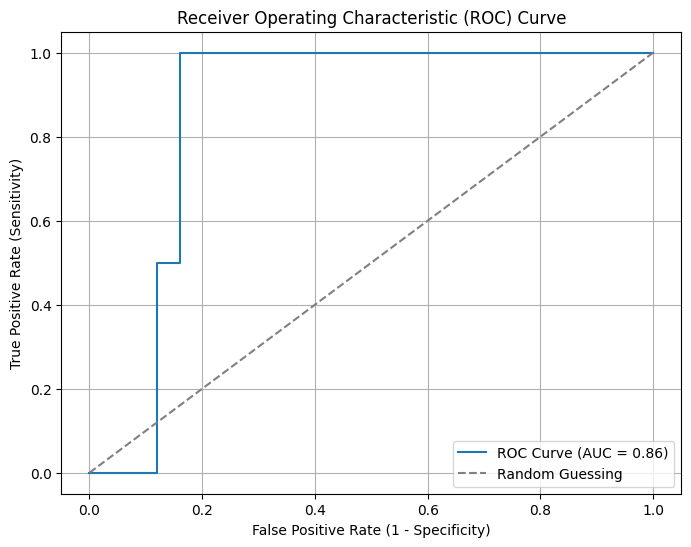

In [29]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()


In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import RandomOverSampler

# Define features and target variables
features = ['year', 'state_fips', 'state_cen', 'state_ic', 'writein', 'candidatevotes', 'totalvotes', 
            'party_simplified_LIBERTARIAN', 'party_simplified_OTHER', 'party_simplified_REPUBLICAN']
target = 'winner'

# Subset the data
data_subset2 = data[features + [target]]

# Split data into training and test sets
X2 = data_subset2[features]
y2 = data_subset2[target]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority', random_state=42)

# Fit and apply the transformation
X_resampled, y_resampled = oversample.fit_resample(X_train2, y_train2)

# Initialize RandomForestClassifier with default parameters
model2 = RandomForestClassifier(random_state=42)

# Fit the model on the resampled data
model2.fit(X_resampled, y_resampled)

# Predict on the test set
y_pred2 = model.predict(X_test2)

# Evaluate model performance
print("Accuracy:", accuracy_score(y_test2, y_pred2))
print("\nClassification Report:")
print(classification_report(y_test2, y_pred2))


Accuracy: 0.9964994165694282

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       855
           1       0.00      0.00      0.00         2

    accuracy                           1.00       857
   macro avg       0.50      0.50      0.50       857
weighted avg       1.00      1.00      1.00       857



In [31]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Assuming X_train, X_test, y_train, y_test are defined from previous code

# Apply SMOTE oversampling
smote = SMOTE(random_state=42)
X_resampled2, y_resampled2 = smote.fit_resample(X_train, y_train)

# Initialize RandomForestClassifier
model3 = RandomForestClassifier(random_state=42)

# Fit the model on the resampled data
model3.fit(X_resampled2, y_resampled2)

# Predict on the test set
y_pred3 = model.predict(X_test2)

# Evaluate model performance
print("Classification Report with SMOTE:")
print(classification_report(y_test2, y_pred3))


Classification Report with SMOTE:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       855
           1       0.00      0.00      0.00         2

    accuracy                           1.00       857
   macro avg       0.50      0.50      0.50       857
weighted avg       1.00      1.00      1.00       857



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler

# Assuming X_resampled, y_resampled, X_test, y_test are defined

# Define parameter grid for LogisticRegression
param_grid = {
    'C': [0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],
    'class_weight': ['balanced']
}

# Initialize LogisticRegression model
model2 = LogisticRegression(random_state=42)

# Apply SMOTE oversampling (or any oversampling technique)
smote = RandomOverSampler(sampling_strategy='minority', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model2, param_grid=param_grid, cv=5, scoring='f1')

# Fit GridSearchCV
grid_search.fit(X_resampled, y_resampled)

# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best F1-score:", grid_search.best_score_)


Best Parameters: {'C': 10.0, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
Best F1-score: 0.9388876800681434


Accuracy: 0.8728121353558926

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.87      0.93       855
           1       0.01      0.50      0.02         2

    accuracy                           0.87       857
   macro avg       0.50      0.69      0.48       857
weighted avg       1.00      0.87      0.93       857

ROC-AUC Score: 0.7181286549707603


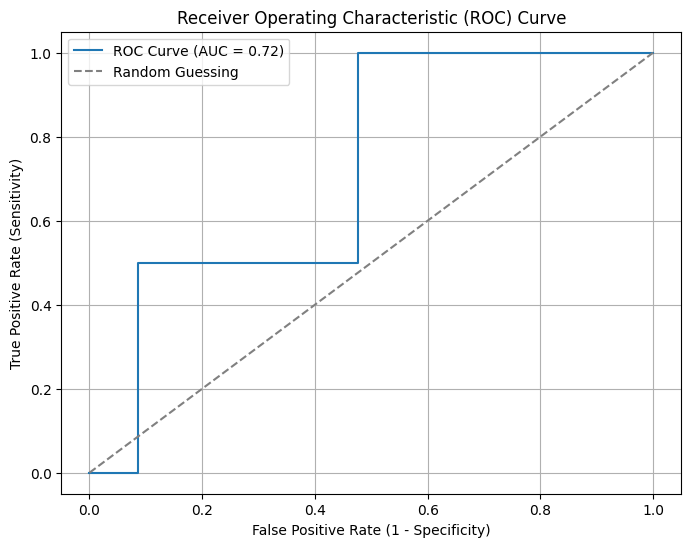

In [33]:
# Best parameters obtained from GridSearchCV
best_params = {'C': 10.0, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}

# Initialize LogisticRegression model with best parameters
model2 = LogisticRegression(**best_params, random_state=42)

# Fit the model on the resampled training data
model2.fit(X_resampled, y_resampled)

# Predict on the test set
y_pred = model2.predict(X_test)
y_proba = model2.predict_proba(X_test)[:, 1]

# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC Score: {roc_auc}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()


/home/user/.local/lib/python3.10/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/user/.local/lib/python3.10/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/home/user/.local/lib/python3.10/site-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(


Accuracy: 0.9964994165694282

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       855
           1       0.00      0.00      0.00         2

    accuracy                           1.00       857
   macro avg       0.50      0.50      0.50       857
weighted avg       1.00      1.00      1.00       857

ROC-AUC Score: 0.9915204678362574


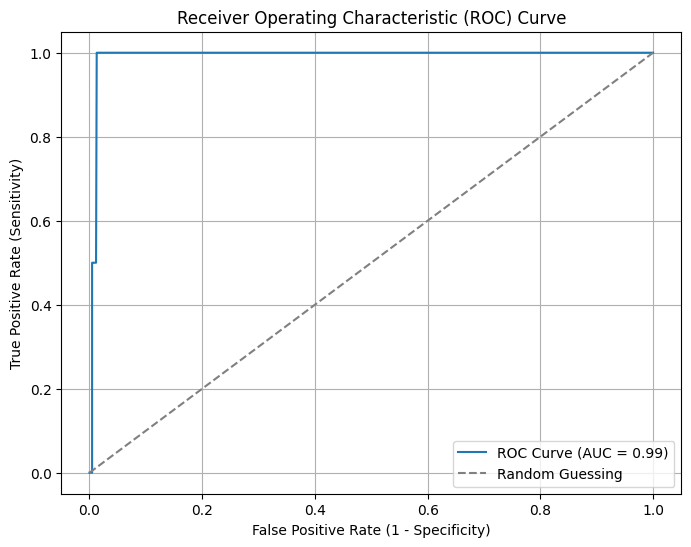

In [34]:
from imblearn.ensemble import BalancedRandomForestClassifier

# Initialize BalancedRandomForestClassifier
brf_model = BalancedRandomForestClassifier(random_state=42, n_estimators=100)

# Fit the model on the resampled training data
brf_model.fit(X_resampled, y_resampled)

# Predict on the test set
y_pred_brf = brf_model.predict(X_test)
y_proba_brf = brf_model.predict_proba(X_test)[:, 1]

# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred_brf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_brf))

# Calculate and print ROC-AUC Score
roc_auc_brf = roc_auc_score(y_test, y_proba_brf)
print(f"ROC-AUC Score: {roc_auc_brf}")

# Plot ROC Curve
fpr_brf, tpr_brf, thresholds_brf = roc_curve(y_test, y_proba_brf)
plt.figure(figsize=(8, 6))
plt.plot(fpr_brf, tpr_brf, label=f'ROC Curve (AUC = {roc_auc_brf:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()


Accuracy: 0.9906651108518086

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       855
           1       0.20      1.00      0.33         2

    accuracy                           0.99       857
   macro avg       0.60      1.00      0.66       857
weighted avg       1.00      0.99      0.99       857

ROC-AUC Score: 0.9926900584795322


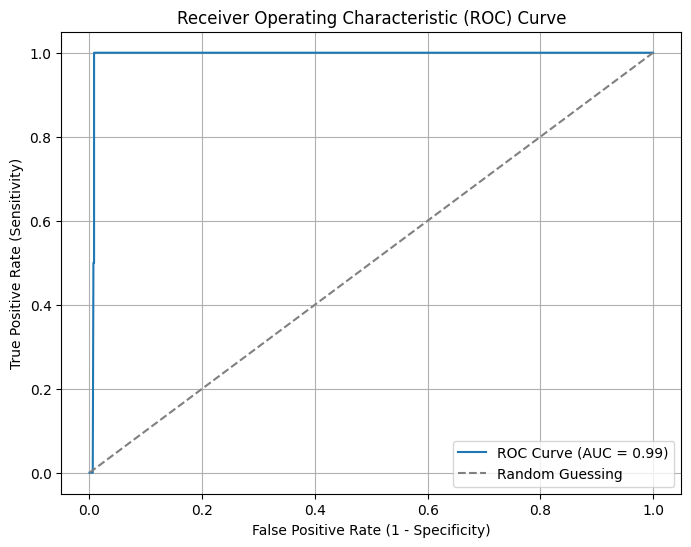

In [36]:
from imblearn.combine import SMOTETomek
from imblearn.ensemble import EasyEnsembleClassifier

# Apply SMOTE with Tomek Links
smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train)

# Initialize EasyEnsembleClassifier
eec = EasyEnsembleClassifier(random_state=42, n_estimators=100)

# Fit the model on the resampled training data
eec.fit(X_resampled, y_resampled)

# Predict on the test set
y_pred_eec = eec.predict(X_test)
y_proba_eec = eec.predict_proba(X_test)[:, 1]

# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred_eec))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_eec))

# Calculate and print ROC-AUC Score
roc_auc_eec = roc_auc_score(y_test, y_proba_eec)
print(f"ROC-AUC Score: {roc_auc_eec}")

# Plot ROC Curve
fpr_eec, tpr_eec, thresholds_eec = roc_curve(y_test, y_proba_eec)
plt.figure(figsize=(8, 6))
plt.plot(fpr_eec, tpr_eec, label=f'ROC Curve (AUC = {roc_auc_eec:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()


/home/user/.local/lib/python3.10/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/user/.local/lib/python3.10/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/home/user/.local/lib/python3.10/site-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(


Accuracy: 0.9918319719953326

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       855
           1       0.14      0.50      0.22         2

    accuracy                           0.99       857
   macro avg       0.57      0.75      0.61       857
weighted avg       1.00      0.99      0.99       857

ROC-AUC Score: 0.927485380116959


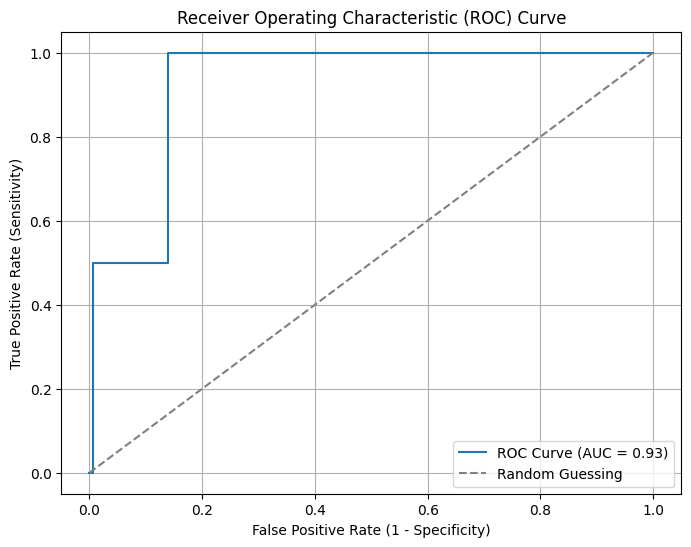

In [38]:
from sklearn.ensemble import VotingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier


# Initialize individual models
brf = BalancedRandomForestClassifier(random_state=42, n_estimators=100)
eec = EasyEnsembleClassifier(random_state=42, n_estimators=100)
lr = LogisticRegression(**best_params, random_state=42)

# Create a VotingClassifier
voting_clf = VotingClassifier(estimators=[
    ('brf', brf),
    ('eec', eec),
    ('lr', lr)
], voting='soft')

# Fit the model on the resampled training data
voting_clf.fit(X_resampled, y_resampled)

# Predict on the test set
y_pred_voting = voting_clf.predict(X_test)
y_proba_voting = voting_clf.predict_proba(X_test)[:, 1]

# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred_voting))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_voting))

# Calculate and print ROC-AUC Score
roc_auc_voting = roc_auc_score(y_test, y_proba_voting)
print(f"ROC-AUC Score: {roc_auc_voting}")

# Plot ROC Curve
fpr_voting, tpr_voting, thresholds_voting = roc_curve(y_test, y_proba_voting)
plt.figure(figsize=(8, 6))
plt.plot(fpr_voting, tpr_voting, label=f'ROC Curve (AUC = {roc_auc_voting:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()


Accuracy: 0.851808634772462

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.85      0.92       855
           1       0.01      0.50      0.02         2

    accuracy                           0.85       857
   macro avg       0.50      0.68      0.47       857
weighted avg       1.00      0.85      0.92       857

ROC-AUC Score: 0.645029239766082


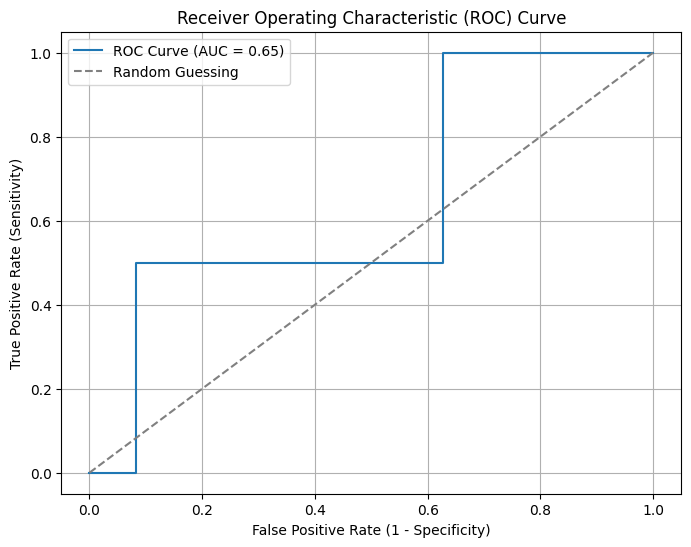

In [39]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Initialize the LogisticRegression model
model_lr = LogisticRegression(**best_params, random_state=42)

# Initialize RFE with the model and number of features to select
rfe = RFE(estimator=model_lr, n_features_to_select=10, step=1)

# Fit RFE
rfe.fit(X_resampled, y_resampled)

# Transform the training and test data to the selected features
X_resampled_rfe = rfe.transform(X_resampled)
X_test_rfe = rfe.transform(X_test)

# Re-train the model using selected features
model_lr.fit(X_resampled_rfe, y_resampled)

# Predict on the test set with selected features
y_pred_rfe = model_lr.predict(X_test_rfe)
y_proba_rfe = model_lr.predict_proba(X_test_rfe)[:, 1]

# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred_rfe))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rfe))

# Calculate and print ROC-AUC Score
roc_auc_rfe = roc_auc_score(y_test, y_proba_rfe)
print(f"ROC-AUC Score: {roc_auc_rfe}")

# Plot ROC Curve
fpr_rfe, tpr_rfe, thresholds_rfe = roc_curve(y_test, y_proba_rfe)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rfe, tpr_rfe, label=f'ROC Curve (AUC = {roc_auc_rfe:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()
